# Monty Hall problem

In this exercise, we're simulating the Monty Hall problem multiple times. Imagine a TV show with three doors: behind one is a car, and behind the other two are goats. The player selects a door, and then the host opens one of the other two doors, revealing a goat. Now, we have three types of players with different strategies:

- **Conservative**: They choose to stick with their initial door.
- **Switcher**: They decide to change their chosen door after one is revealed.
- **Newcomer**: They're unaware of previous moves and randomly select one of the two remaining doors.

The question is, which type of player is more likely to win?


In [24]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [16]:
def MontyHall(n_doors, player):
    #Here I define the doors as a boolean array of False
    doors = [False]*n_doors
    
    #I extract a random index and put the 'car' behind that door
    random_index = random.randint(0, n_doors-1)
    doors[random_index] = True 
    
    # The player makes a choice:  a random number between (0 and n_doors-1)
    player_choice = random.randint(0, n_doors-1)
    
    # If the player chooses the door with the goat (False), presenter will open the other door with goat behind
    if doors[player_choice] == False:
        remaining_doors = [i for i in range(n_doors) if doors[i]==True]
        door_closed = random.choice(remaining_doors)
    
    # Otherwise, if he chooses the door with the car, a random door between the remaining will be opened
    else:
        remaining_doors = [i for i in range(n_doors) if i != player_choice]
        door_closed = random.choice(remaining_doors)
             
    # Each player makes a different choice
    if player == 'Conservative':
        player_choice = player_choice
        
    elif player == 'Switcher':
        new_door_options = [i for i in range(n_doors) if i == door_closed]
        player_choice = random.choice(new_door_options)
        
    elif player == 'Newcomer':
        doors_available = [i for  i in range(n_doors) if i == door_closed or i== player_choice] 
        player_choice = random.choice(doors_available)
            
    return doors[player_choice]    

In [17]:
N = 10000
n_doors = 3

In [18]:
my_players = ['Conservative', 'Switcher', 'Newcomer']
wins_dict = {}

for player in my_players:
    wins = [False] * N
    for i in range(0, N-1):
        wins[i] = MontyHall(n_doors, player)  # Assicurati di passare il nome del giocatore
    n_victories = wins.count(True)
    wins_dict[player] = n_victories

print(wins_dict)

{'Conservative': 3352, 'Switcher': 6666, 'Newcomer': 5106}


In [19]:
prob_dict = {}
for player in my_players:
    prob_dict[player] = wins_dict[player]/N

print(prob_dict)

{'Conservative': 0.3352, 'Switcher': 0.6666, 'Newcomer': 0.5106}


Text(0.5, 1.0, 'Winning probability for Each Player Type')

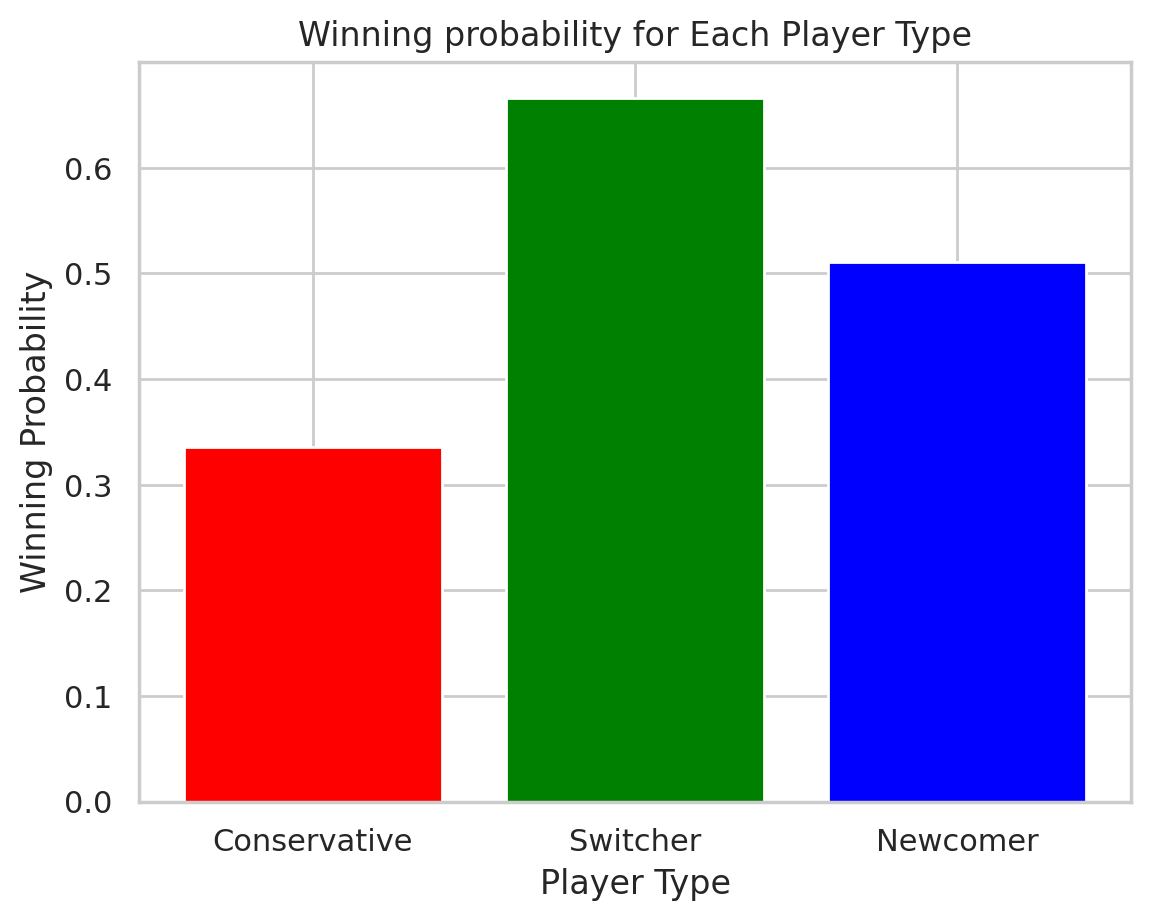

In [34]:
players = list(prob_dict.keys())
probabilities = list(prob_dict.values())
colors = ['red', 'green', 'blue']

plt.bar(players, probabilities, color=colors)

plt.xlabel('Player Type')
plt.ylabel('Winning Probability')
plt.title('Winning probability for Each Player Type')

The $\textbf{Switcher}$ is the player who has more chances to win!!

## Try with more doors

In [20]:
N_doors = [3, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
N_doors = np.array(N_doors)
N_simulations = 1000

prob_list = []

for n in N_doors:
    dict_name = f'{n}_dict'
    locals()[dict_name] = {} 
    
    for player in my_players:
        wins = [False]*N_simulations
        
        for i in range(N_simulations):
            wins[i] = MontyHall(n, player)
            
        victories = wins.count(True)
        locals()[dict_name][player] = victories/N_simulations
     
    prob_list.append(locals()[dict_name])
        
    

In [21]:
prob_list

[{'Conservative': 0.321, 'Switcher': 0.642, 'Newcomer': 0.508},
 {'Conservative': 0.091, 'Switcher': 0.895, 'Newcomer': 0.516},
 {'Conservative': 0.065, 'Switcher': 0.943, 'Newcomer': 0.492},
 {'Conservative': 0.034, 'Switcher': 0.976, 'Newcomer': 0.511},
 {'Conservative': 0.03, 'Switcher': 0.975, 'Newcomer': 0.494},
 {'Conservative': 0.021, 'Switcher': 0.983, 'Newcomer': 0.491},
 {'Conservative': 0.019, 'Switcher': 0.98, 'Newcomer': 0.5},
 {'Conservative': 0.016, 'Switcher': 0.98, 'Newcomer': 0.468},
 {'Conservative': 0.014, 'Switcher': 0.991, 'Newcomer': 0.501},
 {'Conservative': 0.016, 'Switcher': 0.99, 'Newcomer': 0.487},
 {'Conservative': 0.012, 'Switcher': 0.992, 'Newcomer': 0.475}]

In [22]:
Conservative_prob = np.array([entry['Conservative'] for entry in prob_list])
Switcher_prob = np.array([entry['Switcher'] for entry in prob_list])
Newcomer_prob = np.array([entry['Newcomer'] for entry in prob_list])

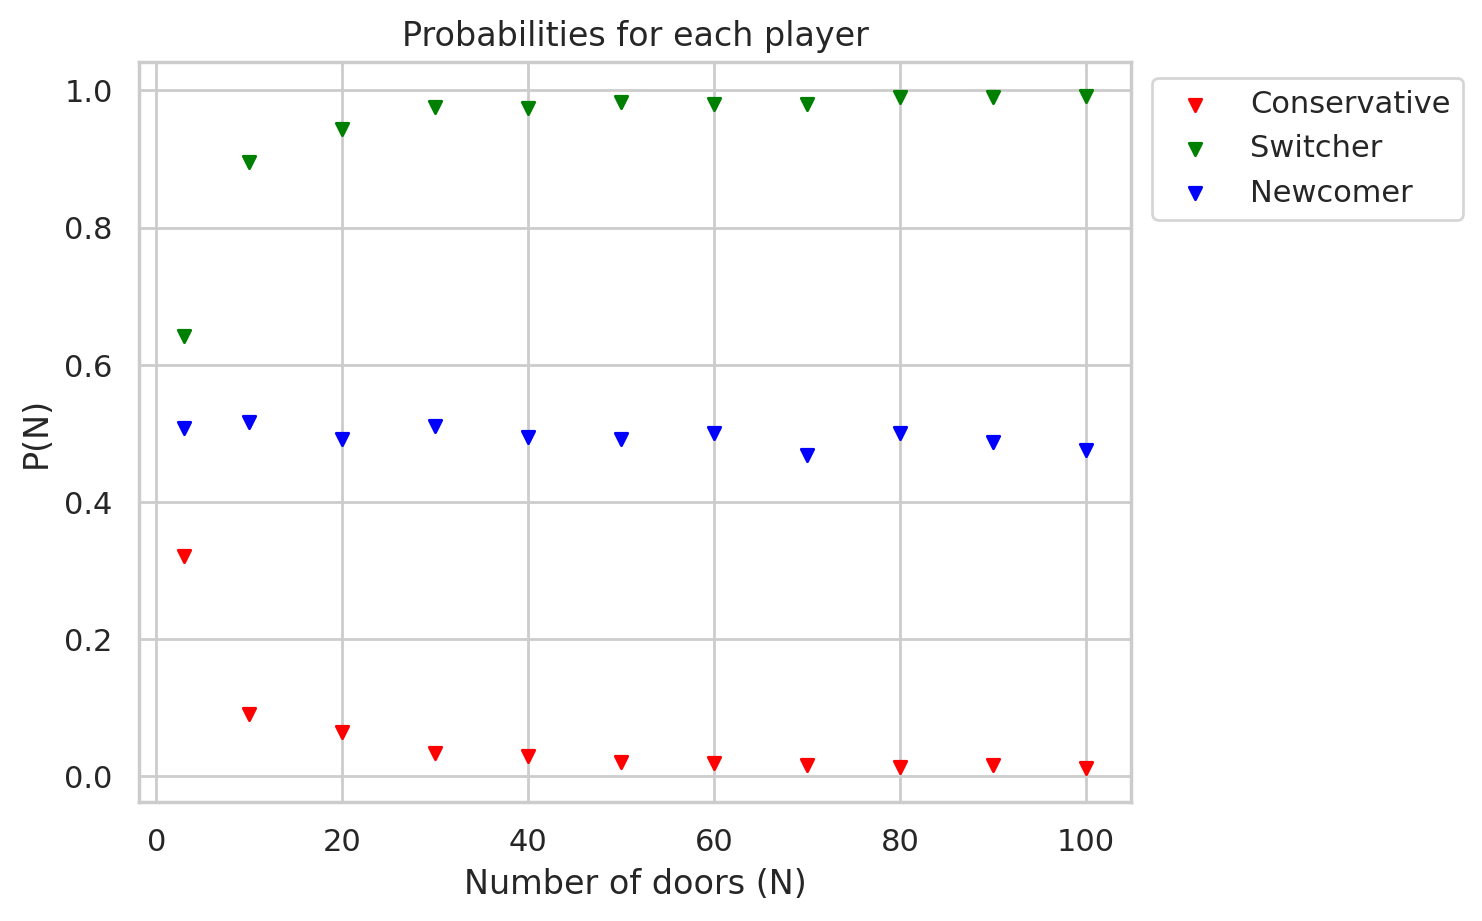

In [32]:
sns.set(style='whitegrid')

plt.scatter(N_doors, Conservative_prob, marker='v', color='red', s=20, label='Conservative')
plt.scatter(N_doors, Switcher_prob, marker='v', color='green', s=20, label='Switcher')
plt.scatter(N_doors, Newcomer_prob, marker='v', s=20, color='blue', label='Newcomer')
plt.title('Probabilities for each player')
plt.xlabel('Number of doors (N)')
plt.ylabel('P(N)')
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))

The **switcher** has more chance to win!